In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date,datetime
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading the Dataset
xls = pd.ExcelFile("Data/Cardiac_Outcomes.xlsx")
#Reading the Hospitalization Discharge sheet
df_HD =pd.read_excel(xls,"Hospitalization_Discharge")
#Reading the CardiacComplications sheet
df_CC = pd.read_excel(xls, "CardiacComplications")
#Reading the Responsiveness sheet
df_R = pd.read_excel(xls, "Responsivenes")
#Reading the PatientHistory sheet
df_PH = pd.read_excel(xls, "PatientHistory")
#Reading the Labs sheet
df_L = pd.read_excel(xls, "Labs")
#Reading the Demography sheet
df_D = pd.read_excel(xls, "Demography")
#Reading the patient_Prescriptions sheet
df_PP = pd.read_excel(xls, "Patient_Precriptions")

In [7]:
res = df_HD.head(10)
print (res)

   inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   
2            866418                 Home     Cardiology  NonEmergency   
3            775928                 Home     Cardiology     Emergency   
4            810128                 Home     Cardiology  NonEmergency   
5            823318                 Home     Cardiology  NonEmergency   
6            844094                 Home     Cardiology  NonEmergency   
7            787530   HealthcareFacility     Cardiology     Emergency   
8            795420                 Home     Cardiology  NonEmergency   
9            829801                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1       

In [16]:
#49.Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)
r = df_D.loc[df_D['gender'] == "Male"]
print(r.loc[:, 'inpatient_number':'gender'])


      inpatient_number gender
0               857781   Male
2               866418   Male
3               775928   Male
6               844094   Male
12              802296   Male
...                ...    ...
1994            816947   Male
1997            750447   Male
2001            726701   Male
2005            781004   Male
2006            744870   Male

[845 rows x 2 columns]


In [26]:
#50.Display the lab details of the patient with maximum pulse using the .loc
Pulse = df_L['pulse']
var_Pulse = Pulse.max()
print(var_Pulse)
r = df_L.loc[df_L['pulse'] == var_Pulse]
print(r.to_markdown())


198
|     |   inpatient_number |   body_temperature |   pulse |   respiration |   systolic_blood_pressure |   diastolic_blood_pressure |   map |   fio2 |   creatinine_enzymatic_method |   urea |   uric_acid |   glomerular_filtration_rate |   cystatin |   white_blood_cell |   monocyte_ratio |   monocyte_count |   red_blood_cell |   coefficient_of_variation_of_red_blood_cell_distribution_width |   standard_deviation_of_red_blood_cell_distribution_width |   mean_corpuscular_volume |   hematocrit |   lymphocyte_count |   mean_hemoglobin_volume |   mean_hemoglobin_concentration |   mean_platelet_volume |   basophil_ratio |   basophil_count |   eosinophil_ratio |   eosinophil_count |   hemoglobin |   platelet |   platelet_distribution_width |   platelet_hematocrit |   neutrophil_ratio |   neutrophil_count |   D_dimer |   international_normalized_ratio |   activated_partial_thromboplastin_time |   thrombin_time |   prothrombin_activity |   prothrombin_time_ratio |   fibrinogen |   high_sensit

      pulse ageCat
0        87  69-79
1        95  69-79
2        98  59-69
3        73  69-79
4        88  69-79
...     ...    ...
2003    117  79-89
2004     70  79-89
2005    113  39-49
2006    134  49-59
2007    100  79-89

[2008 rows x 2 columns]


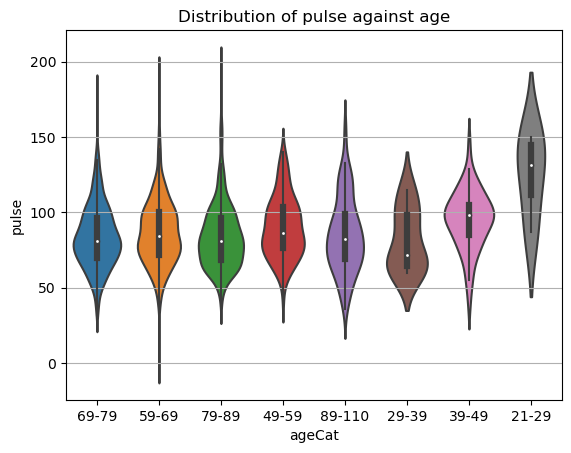

In [11]:
#51.Display a violin chart to show distribution of Pulse Rate against age.

# retain df_D and merge df_L use 'inner join'
dfv = df_D.merge(df_L, on='inpatient_number', how='inner')
dfv_1 = dfv[['pulse','ageCat']]
print(dfv_1)


fontsize = 10

fig, axes = plt.subplots()

sns.violinplot(x = 'ageCat',y = 'pulse', data=dfv_1, ax = axes)
axes.set_title('Distribution of pulse against age')

axes.yaxis.grid(True)
axes.set_xlabel('ageCat')
axes.set_ylabel('pulse')

plt.show()



In [8]:
#52.Create a Point Plot on Age against time to readmission.

# retain df_HD and merge df_D use 'inner join'
dfv = df_D.merge(df_HD, on='inpatient_number', how='inner')
dfv_1 = dfv[['readmission_time_days_from_admission','ageCat']]
print(dfv_1)

dfv_1.plot(kind = 'Point Plot', x = 'readmission_time_days_from_admission', y = 'ageCat')
axes.yaxis.grid(True)
axes.set_xlabel('readmission_time_days_from_admission')
axes.set_ylabel('ageCat')

plt.show()


      readmission_time_days_from_admission ageCat
0                                      NaN  69-79
1                                      NaN  69-79
2                                      NaN  59-69
3                                     19.0  69-79
4                                      NaN  69-79
...                                    ...    ...
2003                                   NaN  79-89
2004                                   NaN  79-89
2005                                  76.0  39-49
2006                                   NaN  49-59
2007                                   NaN  79-89

[2008 rows x 2 columns]


ValueError: Point Plot is not a valid plot kind

In [12]:
#53.What is the correlation between CCI score and outcome?

# retain df_HD and merge df_PH use 'inner join'
dfv_2 = df_PH.merge(df_HD, on='inpatient_number', how='inner')
dfv_3 = dfv_2[['outcome_during_hospitalization','CCI_score']]
print(dfv_3)

Correlation = np.corrcoef('outcome_during_hospitalization','CCI_score')
print(Correlation)

     outcome_during_hospitalization  CCI_score
0                             Alive        2.0
1                             Alive        0.0
2                             Alive        0.0
3                             Alive        2.0
4                             Alive        0.0
...                             ...        ...
2003          DischargeAgainstOrder        2.0
2004                          Alive        1.0
2005                          Alive        2.0
2006          DischargeAgainstOrder        2.0
2007                          Alive        2.0

[2008 rows x 2 columns]


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None